# 1. Šķeps. Eilera metode.

Eilera metode pieder pie diferenciālvienādojumu skaitliskās risināšanas metodēm. Atrisināt diferenciālvienādojumu $ y' = f(x,y) $ ar skaitlisko metodi nozīmē dotajai argumentu $ x_0, x_1, x_2, \dots, x_n $ kopai un dotajai vērtībai $ y_0 $ atrast atbilstošās funkciju vērtības $ y_1, y_2, y_3, \dots, y_n $, kas apmierina doto diferenciālvienādojumu un sākumnosacījumu $ y(x_0)=y_0 $.

Tādējādi skaitliskās metodes ļauj atrast funkcijas $ f(x) $ tabulu, nenosakot pašu funkciju tās analītiskajā formā.

Eilera metode ir visvienkāršākā no diferenciālvienādojumu risināšanas metodēm. Tā nav sevišķi precīza un tāpēc lietojama galvenokārt aptuveniem aprēķiniem. 

Vienlaikus jāņem vērā, ka idejas, uz kurām balstās Eilera metode, ir pamatā arī citām, precīzākām diferenciālvienādojumu skaitliskās integrēšanas metodēm.

Piemērs, ka dots pirmās kārtas diferenciālvienādojums $ y' = f(x,y) $ ar sākumnosacījumu $ x = x_0, y(x_0)=y_0 $ un jāatrod šī vienādojuma atrisinājums intervālā $ [a, b] $.


1. Sadalīsim šo apgabalu $n$ vienādos segmentos, katra segmenta garums būs $\Delta x = \frac{b - a}{n}$.
2. Iegūsim argumentu virni $x_0, x_1, x_2, ..., x_n$,
3. Kā iegūt $x_i$?
Izteikt $x$ vērtības kā:
$$
x_i = x_0 + i \cdot h, \quad i = 0, 1, 2, ..., n
$$
$h = \frac{b - a}{n}$ ir integrēšanas solis.

4. Aplūkosim intervālu $[x_i, x_{i+1}]$ un pieņemsim, ka $y' = f(x, y)$ un integrēsim.
   
$$
\int_{x_i}^{x_{i+1}} f(x, y) \, dx = \int_{x_i}^{x_{i+1}} y' \, dx = y(x)|_{x_i}^{x_{i+1}} = y(x_{i+1}) - y(x_i)
$$

5. Izteiksim $y(x_{i+1})$:

$$
y_{i+1} = y_i + \int_{x_i}^{x_{i+1}} f(x, y) \, dx \\
\int_{x_i}^{x_{i+1}} f(x, y) \, dx = f(x_i, y_i) \int_{x_i}^{x_{i+1}} dx = f(x_i, y_i) \cdot x |_{x_i}^{x_{i+1}} = f(x_i, y_i) (x_{i+1} - x_i) = y'_i \cdot h
$$
jeb

$$
y_{i+1} = y_i + \int_{x_i}^{x_{i+1}} f(x, y) \, dx \approx y_i + y'_i \cdot h
$$

Vēlamies kaut ko viegli rakstāmo
$$
\Delta y_i = y'_i \cdot h \\
y_{i+1} = y_i + \Delta y_i
$$

Un šī ir Eilera metode. Iegūstam atrisinājuma tabulu:
$$
\begin{array}{c|c|c}
i & x_i & y_i \\
\hline
0 & x_0 & y_0 \\
1 & x_1 & y_1 \\
2 & x_2 & y_2 \\
\vdots & \vdots & \vdots \\
n & x_n & y_n \\
\end{array}
$$


Aplūkosim ģeomētrisku reprezentāciju kādas funkcijas diskretizācijai:

Text(0.3866666666666666, 0.1, '$h = \\Delta x$')

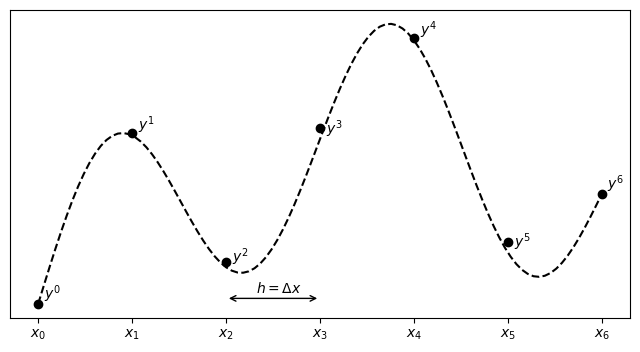

In [1]:
import matplotlib.pyplot as plt
import numpy as np


N = 100
T = 1
t = np.linspace(0, T, N)
f = lambda t: t + np.sin(4*t*np.pi) + np.sin(t*np.pi)
fig, ax = plt.subplots(1, 1, figsize=(8, 4)) 
ax.plot(t, f(t), 'k--')
rnd = np.array([0, 0.02, 0.05, 0.1, 0.02, 0.1, 0])
t = np.linspace(0, T, 7)
ax.plot(t, f(t)+rnd, 'ko')

for i, ti in enumerate(t):
    ax.text(ti+0.01, f(ti)+0.05, f'$y^{i}$')
ax.set_xticks(t)
ax.set_xticklabels([f'$x_{i}$' for i in range(7)]);
ax.set_yticks([]);

# draw brackets between x3 and x2 to illustrate the step size
ax.annotate('', xy=(t[3], 0.05), xytext=(t[2], 0.05), arrowprops={'arrowstyle': '<->'})
ax.text((t[2]+t[3])/2 - 0.03, 0.1, r'$h = \Delta x$')

## 1. piemērs. Parabola.

Ir zināms, ka funkcijas $f$ atvasinājuma $f'$ vērtība punktā $x$ ir $f'(x) = 2x$ un ka $f(0) = 0$. Tuvināti aprēķināt $f(4)$ ar Eilera metodi, ņemot soli $h = 1$. Uzzimēt analītisko risinājumu un Eilera metodes rezultātus.

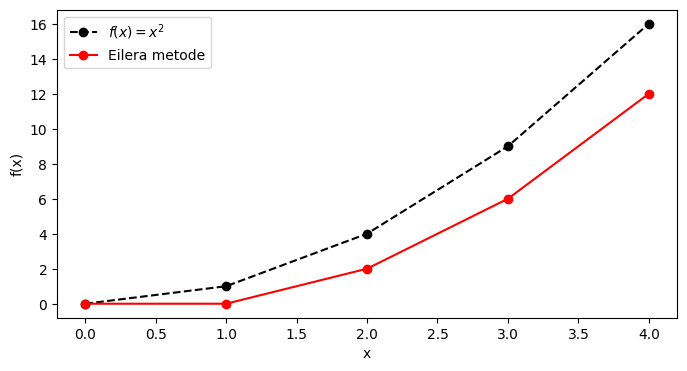

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def parabola(x):
    return x**2 # analītisks atrisinājums

def parabola_derivative(x):
    return 2*x # parabolas atvasinājums

def euler_method_parabola(df, x0, y0, h, n_steps):
    x_values = [x0]
    y_values = [y0]
    
    for _ in range(n_steps):
        x_next = x_values[-1] + h
        y_next = y_values[-1] + df(x_values[-1]) * h
        x_values.append(x_next)
        y_values.append(y_next)
    
    return np.array(x_values), np.array(y_values)

N = 10
T = 4
h = 1
n_steps = int(T/h)
t = np.linspace(0, T, n_steps+1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, parabola(t), 'ko--', label=r"$f(x)=x^2$")
x_euler, y_euler = euler_method_parabola(parabola_derivative, x0=0, y0=0, h=h, n_steps=n_steps)
ax.plot(x_euler, y_euler, 'o-', label='Eilera metode', color='red')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

## 2. uzdevums. Ķermeņa atdzišana.

Funkcija $T$ apraksta ķermeņa temperatūru, t.i., laika momentā $t$ ķermeņa temperatūra ir $T(t)$. Ir zināms, ka $T$ atvasinājums $T'$ apmierina sakarību $T' = -T + 2$ un ka $T(0) = 3$. Tuvināti aprēķināt $T(0,8)$ ar Eilera metodi, ņemot soli $h = 0,1$.

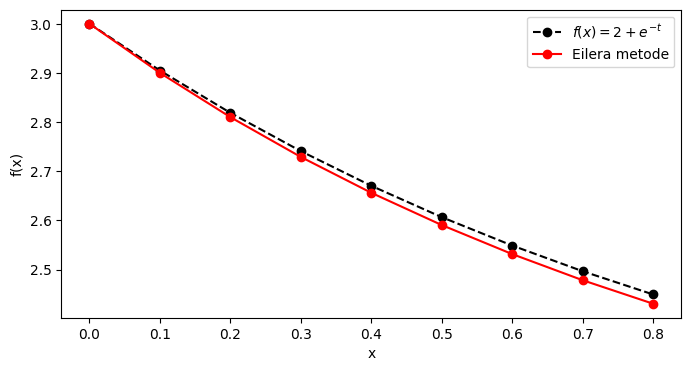

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def analytic_solution(t):
    return 2 + np.exp(-t)

def temp_derivative(T):
    return -T + 2

def euler_method(df, x0, y0, h, n_steps):
    x_values = [x0]
    y_values = [y0]
    
    for _ in range(n_steps):
        x_next = x_values[-1] + h
        y_next = y_values[-1] + df(y_values[-1]) * h
        x_values.append(x_next)
        y_values.append(y_next)
    
    return np.array(x_values), np.array(y_values)

N = 10
T = 0.8
h = 0.1
n_steps = int(T / h)
t = np.linspace(0, T, n_steps+1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, analytic_solution(t), 'ko--', label=r"$f(x)=2 + e^{-t}$")
x_euler, y_euler = euler_method(temp_derivative, x0=0, y0=3, h=h, n_steps=n_steps)
ax.plot(x_euler, y_euler, 'o-', label='Eilera metode', color='red')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

## Piezīmes par kustību (1D/2D)

Slīpi pret horizontu mesta ķermeņa kustība, neņemot vērā gaisa pretestību $\Rightarrow$ 2D kustība.

Sāksim ar 1D gadījumu.

- $g=\text{const}$, $g = 9.81\ \mathrm{m/s^2}$ (vērsts uz leju)

Kā izskatās ātruma moduļa grafiks no laika?

Mēs varam nonākt pie ātruma, zinot paātrinājumu $\Rightarrow$  
$$
a=\frac{dv}{dt}
$$
(paātrinājums ir ātruma atvasinājums). Ja atceramies atvasinājuma definīciju, tad zinām,
ka tuvinēti varam rakstīt
$$
a=\frac{\Delta v}{\Delta t},
$$
kur $\Delta t \to 0$ un $\Delta v$ ir ātruma izmaiņa.

$$
\Delta t = t_{\text{b}} - t_{\text{s}},\qquad \Delta v = v_{\text{b}} - v_{\text{s}}
$$

$$
a=\frac{\Delta v}{\Delta t}=\frac{v_{\text{b}}-v_{\text{s}}}{\Delta t}
\ \Rightarrow\ 
v_{\text{b}} = v_{\text{s}} + a\,\Delta t
$$

Šādi drīkstam rakstīt tikai tad, ja $\Delta t \to 0$ (ļoti mazs!). Šādas tuvinātas metodes sauksim par skaitliskajām
metodēm, kas arī ir Eilera metode.

## 3. uzdevums. 1D kustība.

Aprēķiniet trajektoriju izmantojot $x_1 = x_0 + v_0 \Delta t$ un $\Delta t = 0,1 s$.
Attēlojiet trajektoriju grafikā un pievienojiet tam teorētisko $x(t)$ izteiksmi.


In [ ]:
# CODE TO BE CONTINUED